In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../New folder (2)"))

# Any results you write to the current directory are saved as output.

['.ipynb_checkpoints', 'kernel50e915ad50.ipynb', 'test.csv', 'train.csv']


In [5]:
import pandas as pd
import torch


dataset = pd.read_csv("train.csv", dtype = np.float32)
targets_numpy = dataset.label.values
features_numpy = dataset.loc[:, dataset.columns != 'label'].values

In [6]:
features_numpy = features_numpy/255

In [7]:
print(len(features_numpy),len(targets_numpy))

42000 42000


In [8]:
train_features_numpy, train_labels_numpy = features_numpy[:20000], targets_numpy[:20000]
print(len(train_features_numpy), len(train_labels_numpy))

20000 20000


In [9]:
valid_features_numpy, valid_labels_numpy = features_numpy[20000:], targets_numpy[20000:]
print(len(valid_features_numpy), len(valid_labels_numpy))

22000 22000


In [10]:
train_features, train_labels = torch.from_numpy(train_features_numpy), torch.from_numpy(train_labels_numpy).type(torch.LongTensor)

In [11]:
valid_features, valid_labels = torch.from_numpy(valid_features_numpy), torch.from_numpy(valid_labels_numpy).type(torch.LongTensor)

In [12]:
import torchvision.transforms as transforms
from torchvision import datasets

train = torch.utils.data.TensorDataset(train_features,train_labels)
test = torch.utils.data.TensorDataset(valid_features,valid_labels)
train_loaders = torch.utils.data.DataLoader(dataset = train, batch_size = 64, shuffle = True)
test_loaders = torch.utils.data.DataLoader(dataset = test, batch_size = 64, shuffle = True)

In [13]:
import matplotlib.pyplot as plt
plt.imshow(features_numpy[2].reshape(28,28))
plt.axis("off")
plt.title(str(targets_numpy[2]))
plt.savefig('graph.png')
plt.show()

<Figure size 640x480 with 1 Axes>

In [14]:
import torch.nn as nn
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super(Network,self).__init__()
        
        self.fc1 = nn.Linear(28*28,400)
        self.fc2 = nn.Linear(400,10)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [15]:
model = Network()

In [16]:
if torch.cuda.is_available():
    model.cuda()

In [55]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.001)

In [74]:
from torch.autograd import Variable

epochs = 150
count = 0
loss_list = []
iteration_list = []
model.train()
model.cuda()

for epochs in range(epochs):
    for i,(images, labels) in enumerate(train_loaders):
        model.train()
        train = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        
        if torch.cuda.is_available():
            train, labels = train.cuda(), labels.cuda()
        
        optimizer.zero_grad()
        
        outputs = model(train)
        
        loss = criterion(outputs, labels)
        
        loss.backward()
        optimizer.step()
        
        count += 1
        
        if count % 50 == 0 and count!=0:
            correct = 0
            total = 0
            
            for image, label in test_loaders:
                if len(image)==len(label):
                    train = Variable(image.view(-1, 28*28))
                
                    if torch.cuda.is_available():
                        train = train.cuda()
                        label = label.cuda()
                    model.eval()
                    
                    output = model(train)
                
                    predicted = torch.max(output.data, 1)[1]
                    #print(len(label),len(train))
                
                    total += len(label)
                
                    correct += (predicted == label).sum()
                
                    accuracy = 100 * correct / float(total)
            
                loss_list.append(loss.data)
                iteration_list.append(count)
        if count % 500 == 0:
            # Print Loss
            print('Iteration: {}  Loss: {}  Accuracy: {}%'.format(count, loss.data, accuracy))
        
        
        
        
        

Iteration: 500  Loss: 0.005709148943424225  Accuracy: 96%
Iteration: 1000  Loss: 0.018181830644607544  Accuracy: 96%
Iteration: 1500  Loss: 0.009104996919631958  Accuracy: 96%
Iteration: 2000  Loss: 0.02430710941553116  Accuracy: 96%
Iteration: 2500  Loss: 0.012108676135540009  Accuracy: 96%
Iteration: 3000  Loss: 0.015550710260868073  Accuracy: 96%
Iteration: 3500  Loss: 0.01770760864019394  Accuracy: 96%
Iteration: 4000  Loss: 0.012350447475910187  Accuracy: 96%
Iteration: 4500  Loss: 0.01685786247253418  Accuracy: 96%
Iteration: 5000  Loss: 0.022722430527210236  Accuracy: 96%
Iteration: 5500  Loss: 0.010050676763057709  Accuracy: 96%
Iteration: 6000  Loss: 0.008445635437965393  Accuracy: 96%
Iteration: 6500  Loss: 0.012434914708137512  Accuracy: 96%
Iteration: 7000  Loss: 0.007149353623390198  Accuracy: 96%
Iteration: 7500  Loss: 0.0160905122756958  Accuracy: 96%
Iteration: 8000  Loss: 0.021386049687862396  Accuracy: 96%
Iteration: 8500  Loss: 0.016700126230716705  Accuracy: 96%
Ite

In [75]:
model.eval()

Network(
  (fc1): Linear(in_features=784, out_features=400, bias=True)
  (fc2): Linear(in_features=400, out_features=10, bias=True)
)

In [76]:
testset = pd.read_csv("test.csv", dtype = np.float32)
test_numpy = testset.values
test_numpy = test_numpy/255
print(len(test_numpy))

28000


In [77]:
test_features = torch.from_numpy(test_numpy)

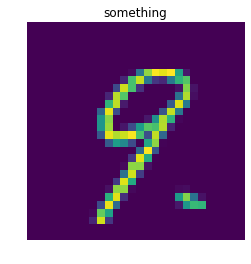

In [78]:
plt.imshow(testset.values[2].reshape(28,28))
plt.axis("off")
plt.title("something")
plt.savefig('graph.png')
plt.show()

In [79]:
model.cpu()
feat = Variable(test_features[2].view(-1, 28*28))
output = model(feat)
predicted = torch.max(output.data, 1)[1]
print(predicted.numpy()[0])


9


In [80]:
key = []
value = []
for i in range(len(test_features)):
    feat = Variable(test_features[i].view(-1, 28*28))
    output = model(feat)
    predicted = torch.max(output.data, 1)[1]
    key.append(i+1)
    value.append(predicted.numpy()[0])

In [81]:
print(len(key),len(value))

28000 28000


In [82]:
op = 2
print(key[op],value[op])

3 9


In [83]:
submission = pd.DataFrame({'ImageId':key,'Label':value})

In [84]:
submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [85]:
submission.to_csv("digit_recognizer3.csv",index=False)

In [86]:
print(len(key),len(value))

28000 28000


In [87]:
print(len(submission))

28000
